#  "A basic ML workflow template"

> " An end to end machine learning summary with data shipped from sklearn. The end goal is to lay the ground work for other templates within each step."

- toc: true 
- comments: true
- categories: [machine learning, jupyter notebooks, sklearn, data science, searborn]
- image: images/logo.png
- permalink: /basicmlworkflow


## Brief Intro

Its good to simplify a problem and walk over it till the end. We choose the cleanest most agreeable data to walk through our data science processs. But first, we explain what machine learning is, and how supervised and unsupervised models differ. 



## Supervised and Unsupervised Learning 

Why machine learning? Machine learning helps solve a unique class of problems. Take for example, facial recognition, or language translation. These problems come ever close to how humans perceive the world. Such that machines are now an embeded part of human interaction, without which, we feel less of ourselves...This is only the beginning.

Machine learning has 3 main flavours, Supervised, Unsupervised and Reinforcement Learning. The main data structures are tabular data, image data, language and timeseries.   
In supervised learning, we know what the ground truth is. We have recorded enough outcomes given certain events and interactions. The outcomes are the labels or dependent variables (y), that are the end product of feature interactions of independent variables(x). 
A model is a recipe of features that can map feature interaction to a label with certain degree of acceptance. The degree of acceptance is accuracy in a reproducable and generalised way. Simply put, a model is a function that maps x(s) to y. 

In unsupervised learning, we dont have labels, we learn labels or categories from features. 

### More about simple supervised models. 

Supervised models are either classification or regression type.
Classification models predict the class labels from a finite group i.e boy or girl, species of plant, type of disease etc.
Regression models predict labels as continous variables. i.e house price, fuel consumption etc.

### The enterprise workflow  

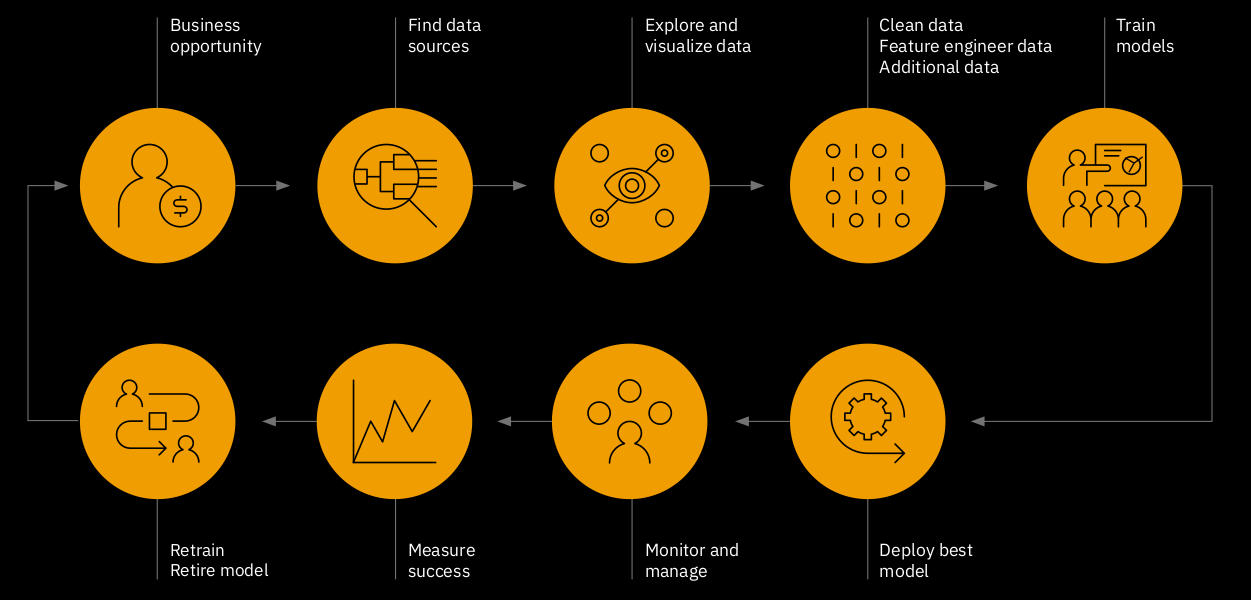

This workflow is explained futher here.

### Step 0 Problem statement and libraries needed

We are given an array of petal and sepal measurements for 3 iris species. Our role is predict the species correclty if given new taxonomic measurements of petals and sepals of the same species of flowers. This is clearly a classification problem. 

In [1]:
# lets start with a simple flower classification model with the iris data set 
# the data is already in sklearn.

from sklearn import datasets
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Step 1: Loading and preliminary data inspection

In [2]:
#load dataset 

iris = datasets.load_iris()

print(f' type iris: {type(iris)}')
print(f'iris keys: {iris.keys()}')
print(f'type iris.data: {type(iris.data)}')
print(f'type iris.target: {type(iris.target)}')

 type iris: <class 'sklearn.utils.Bunch'>
iris keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
type iris.data: <class 'numpy.ndarray'>
type iris.target: <class 'numpy.ndarray'>


> Note: this is a dictionary of numpy.array values. We will have to create out pandas dataframe using the keys.

In [6]:
#create a dataframe of features

df= pd.DataFrame(iris.data, columns= iris.feature_names)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Step 2 Data Exploration and Visualization

We always want to visualize data. The reason is 2 fold. It will help you draw up conclusions fast and it will most likely be the method in which you communicate your findings. 

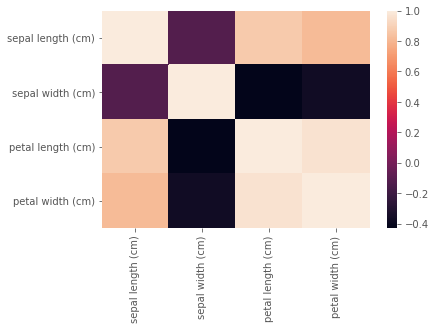

In [42]:
sns.heatmap(df.corr())

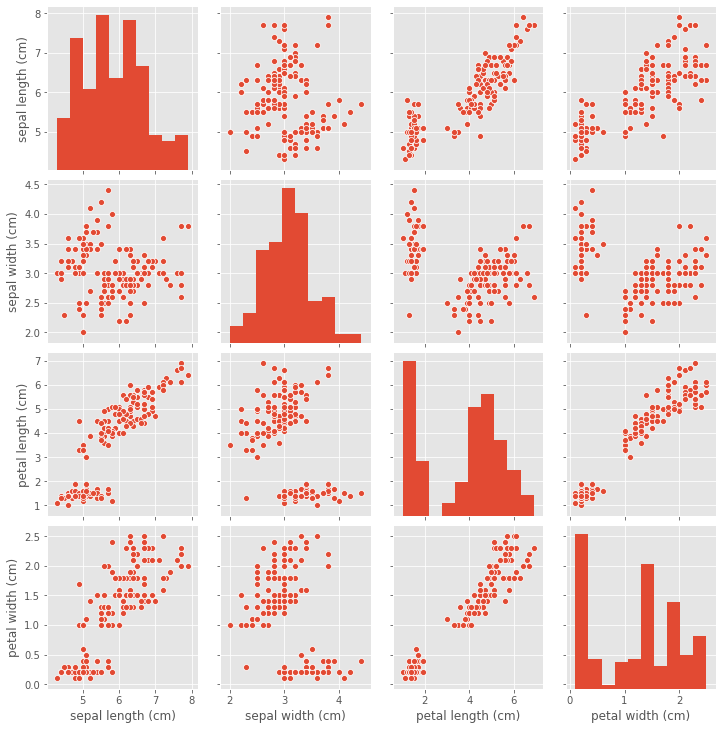

In [44]:
sns.pairplot(df)

TODO: Add notes We aready know that our label had class of 3 flower

   ### Step 3:  Training the model
  

In [83]:
# apply knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6) 
x , y = iris.data, iris.target

knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

> Note: note we did not fit on a dataframe. We fit our model on nympy.array.

In [87]:
x.shape, y.shape, type(x), type(y)

((150, 4), (150,), numpy.ndarray, numpy.ndarray)

### Step 4 Making predictions on test data 

In [74]:

new_data = np.array([[5.6, 2.8, 3.9, 1.1],
                    [4.0, 2.1, 1.0, 0.2],
                    [4.3, 3.6, 1.0, 0.3],
                    [5.7, 2.6, 3.8, 1.3]])
prediction = knn.predict(new_data)

print( prediction)

[1 0 0 1]


###  Step 5 Perfomance Metrics 

What model would be compelete if did not try to measure how well it perfomed. 
Say, a scientist handed us new data, kneatly formated to suit our training data (how thoughtful), how convincing is pur classification model to accurately label the dataset? 

Model accuracy. It means that your model is verifiable, generalizable and reproducable. 

Our model, has no more data to test on, we used all our data to train. This is obviously a problem. We cant pose the same questions to our intelligent model, that we used to train it on. A 100% accuracy wouldnt be imperessive in this scenario.

So what should we have different?

Splitting our data into train, test and validation set. 

For now, we stick to train and test. 

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.2,\
                                               random_state = 1, stratify = y)
knn= KNeighborsClassifier(n_neighbors=8)

knn.fit(xtrain, ytrain)

ypred = knn.predict(xtest)

print(ypred)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


In [100]:
print(f'score: {knn.score(xtest, ytest)}')
print(f'accuracy: {accuracy_score(ypred, ytest)}')

score: 0.9666666666666667
accuracy: 0.9666666666666667


> Note: knn.score calls accuracy_score under the hood, that is why they give the same result. 

We are at 97% model accuracy in telling apart iris flower species.

It be nice if we say the predicions as flower species names as opposed to numbers? Lets decode the predictions

In [105]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(iris.target_names)
le.inverse_transform(ypred)


array(['virginica', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor'], dtype='<U10')

There is alot we didnt cover, eg our chosen KNN model intuition, what were other alternative models, would our model generalize well, is it reproducable etc. That comes later. 

We now have a canvas to start with, not one we are proud of, but a canvas no matter. This is very weak canvas that barely paints the horizon, we  have over simplified our responsibilites, on purpose. Later, we will revisit each step, go off on tangents, grow the number of steps and try more demanding challenges. 

To learn more : <a href="https://www.datacamp.com?tap_a=82040-4385c0&tap_s=1363842-0cfaf5" target="_BLANK" rel="nofollow"><img src="https://static.tapfiliate.com/5f922766d7ec0196634518.png?a=82040-4385c0&s=1363842-0cfaf5" border="0"></a>